
Задание 1.
Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

Дополнительные вводные:
Так как продукт Б новый, возможно стоит предложить дисконт от цены Продукта А. Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [1]:

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup

In [2]:
from google.colab import files 
uploaded = files.upload()


Saving cur_oil.xlsx to cur_oil.xlsx


In [3]:
df = pd.read_excel('cur_oil.xlsx')
df

,Date,EURUSD=X,OIL
0,2018-01-01,1.2005,NaN
1,2018-01-02,1.2012,59.15
2,2018-01-03,1.2063,59.15
3,2018-01-04,1.2010,59.15
4,2018-01-05,1.2069,60.44
...,...,...,...
341,2019-04-23,1.1259,67.72
342,2019-04-24,1.1224,67.14
343,2019-04-25,1.1153,66.37
344,2019-04-26,1.1137,64.27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      346 non-null    datetime64[ns]
 1   EURUSD=X  346 non-null    float64       
 2   OIL       332 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.2 KB


In [5]:
df.dropna()

,Date,EURUSD=X,OIL
1,2018-01-02,1.2012,59.15
2,2018-01-03,1.2063,59.15
3,2018-01-04,1.2010,59.15
4,2018-01-05,1.2069,60.44
5,2018-01-08,1.2037,60.44
...,...,...,...
341,2019-04-23,1.1259,67.72
342,2019-04-24,1.1224,67.14
343,2019-04-25,1.1153,66.37
344,2019-04-26,1.1137,64.27


In [6]:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)
PC = PRODUCTION_COST

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
EL = EU_LOGISTIC_COST_EUR
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах
CL = CN_LOGISTIC_COST_USD

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%

Проанализировать имеющиеся данные.
Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
Отобразить на графике.
Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
Создать директорию «для клиентов» и в ней сложить файлы с расчетами.
Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf) с именем клиента…

In [7]:
# цена на заводе

price =  16 * df.OIL / df['EURUSD=X'] + 400   


In [8]:
# добавим колонку с результатом в df

df1 = df.assign(price = df['OIL']*16/df['EURUSD=X']+400)
df1

,Date,EURUSD=X,OIL,price
0,2018-01-01,1.2005,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788
2,2018-01-03,1.2063,59.15,1184.547791
3,2018-01-04,1.2010,59.15,1188.009992
4,2018-01-05,1.2069,60.44,1201.259425
...,...,...,...,...
341,2019-04-23,1.1259,67.72,1362.359002
342,2019-04-24,1.1224,67.14,1357.091946
343,2019-04-25,1.1153,66.37,1352.138438
344,2019-04-26,1.1137,64.27,1323.336626


,Date,EURUSD=X,OIL,price
0,2018-01-01,1.2005,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788
2,2018-01-03,1.2063,59.15,1184.547791
3,2018-01-04,1.2010,59.15,1188.009992
4,2018-01-05,1.2069,60.44,1201.259425


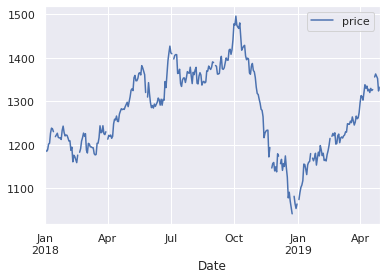

In [9]:
# отобразила на графике

df1.plot(x='Date', y='price')
df1.head(5)

In [10]:
# добавим колонку с рассчетом цены для каждого клиента

df2 = df1.assign(eur = df1.price + 30)
df2


,Date,EURUSD=X,OIL,price,eur
0,2018-01-01,1.2005,NaN,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788,1217.878788
2,2018-01-03,1.2063,59.15,1184.547791,1214.547791
3,2018-01-04,1.2010,59.15,1188.009992,1218.009992
4,2018-01-05,1.2069,60.44,1201.259425,1231.259425
...,...,...,...,...,...
341,2019-04-23,1.1259,67.72,1362.359002,1392.359002
342,2019-04-24,1.1224,67.14,1357.091946,1387.091946
343,2019-04-25,1.1153,66.37,1352.138438,1382.138438
344,2019-04-26,1.1137,64.27,1323.336626,1353.336626


In [11]:
# сохранила как файл csv

df2.to_csv('europe.csv')

In [12]:
df3 = df1.assign(chi = df1.price + 130)
df3


,Date,EURUSD=X,OIL,price,chi
0,2018-01-01,1.2005,NaN,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788,1317.878788
2,2018-01-03,1.2063,59.15,1184.547791,1314.547791
3,2018-01-04,1.2010,59.15,1188.009992,1318.009992
4,2018-01-05,1.2069,60.44,1201.259425,1331.259425
...,...,...,...,...,...
341,2019-04-23,1.1259,67.72,1362.359002,1492.359002
342,2019-04-24,1.1224,67.14,1357.091946,1487.091946
343,2019-04-25,1.1153,66.37,1352.138438,1482.138438
344,2019-04-26,1.1137,64.27,1323.336626,1453.336626


In [13]:
df3.to_csv('china.csv')

In [23]:
# Создать директорию «для клиентов» и в ней сложить файлы с расчетами
import os

# определим имя директории, которую создаём
path = "/tmp/price"

try:
    os.mkdir(path)
except OSError:
    print ("Создать директорию %s не удалось" % path)
else:
    print ("Успешно создана директория %s " % path)

Успешно создана директория /tmp/price 



Задание 2. Продолжение
Клиенты согласились на ваше предложение. Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла

Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

In [19]:
# выбрала данные за последний месяц

df2 = df[(df['Date'] > '2019-04-01') & (df['Date'] <= '2019-04-29')]
df2

,Date,EURUSD=X,OIL
326,2019-04-02,1.1206,63.92
327,2019-04-03,1.1204,63.75
328,2019-04-04,1.1247,63.42
329,2019-04-05,1.1226,64.58
330,2019-04-08,1.1220,65.75
331,2019-04-09,1.1256,65.40
332,2019-04-10,1.1267,65.81
333,2019-04-11,1.1277,65.09
334,2019-04-12,1.1261,65.26
335,2019-04-15,1.1305,64.99


In [22]:
# нашла среднее

EUUS = df2['EURUSD=X'].mean()
EUUS

1.1238000000000001

In [23]:
OIL = df2['OIL'].mean()
OIL

65.35947368421053

In [24]:
# аналогично за последние 3 месяца

df3 = df[(df['Date'] > '2019-02-01') & (df['Date'] <= '2019-04-29')]
df3

,Date,EURUSD=X,OIL
285,2019-02-04,1.1455,56.39
286,2019-02-05,1.1436,55.38
287,2019-02-06,1.1410,55.65
288,2019-02-07,1.1366,54.25
289,2019-02-08,1.1339,54.30
...,...,...,...
341,2019-04-23,1.1259,67.72
342,2019-04-24,1.1224,67.14
343,2019-04-25,1.1153,66.37
344,2019-04-26,1.1137,64.27


In [25]:
EUU = df3['EURUSD=X'].mean()
EUU

1.129701639344262

In [26]:
OI = df3['OIL'].mean()
OI

60.54915254237287

In [31]:
price_eur1 =  16 * OIL / EUUS + 400  + 30
price_chi1 = 16 * OIL / EUUS + 400  + 130
price_eur2 =  16 * OI / EUUS + 400  + 30
price_chi2 = 16 * OI / EUUS + 400  + 130

print(price_eur1, price_chi1, price_eur2, price_chi2)

1360.5495452459231 1460.5495452459231 1292.0630367307047 1392.0630367307047



Задание 3. Back to Russia
К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.

На основе тех данных, которые уже есть предложите цену новому клиенту.
Подготовьте скрипт, который будет использовать курс публикуемый на сайте ЦБ РФ.


In [42]:
# получила курс евро на сегодня

webpage = urlopen('http://www.cbr.ru/currency_base/daily/').read().decode('utf-8')
soup = BeautifulSoup(webpage)
#print(webpage)
for tr in soup.findAll('tr'):
    if len(tr.findAll('td')) < 5:
        continue
    tdl = tr.findAll('td')
    #print(tdl)
    #for td in tr.findAll('td'):
    if tdl[1].text == "EUR":
        #print(tdl[4].text)
        EURRUB = float(tdl[4].text.replace(',', '.'))
EURRUB


87.5673

In [44]:
# считаю цену для поставщика из России

price_RU =  16 * OIL / EUUS*EURRUB + 400
price_RU

81885.71119341331

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [ ]:
# Module file: BBP.py

import BBP

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

Создайте отдельный пакет, который можно устанавливать с помощью pip
В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
Выложите пакет в репозиторий


In [ ]:
!pip install BBP-1.1.tar.gz
from BBP import BBP